<a href="https://colab.research.google.com/github/shintafiaa/Kampus-Merdeka-Pengembangan-ML/blob/main/Kampus_Merdeka_Time_Series_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shinta Roudlotu Hanafia

Submission ke-2 Modul Pengembangan ML pada Dicoding Course


shintafiaa@gmail.com

2 Oktober 2021

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [20]:
data_train = pd.read_csv('GlobalTemperatures.csv')
data_train.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data_train.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [21]:
data_train.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [22]:
#Droping all null values
data_train = data_train.dropna(how='any' ,axis=0)
data_train.shape

(1992, 9)

In [23]:
data_train.isnull().sum()

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

In [24]:
data_train.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

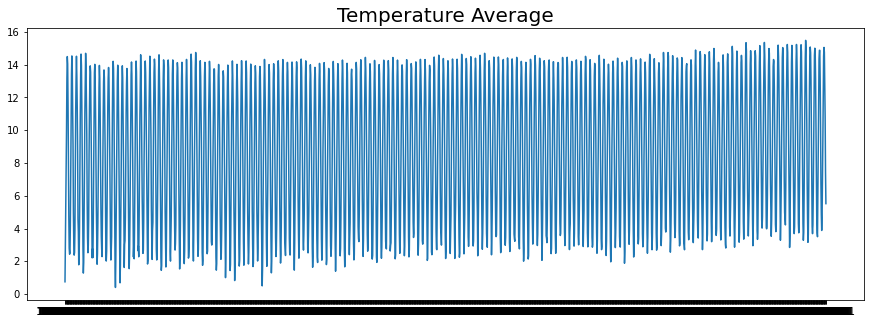

In [26]:
dates = data_train['dt'].values
temp  = data_train['LandAverageTemperature'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title("Temperature Average",
          fontsize=20);

In [27]:
#menerima sebuah series/atribut kita yang telah di konversi menjadi tipe numpy, lalu mengembalikan label dan atribut dari dataset dalam bentuk batch
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [30]:
#2 buah layer LSTM
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [31]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nAkurasi model telah mencapai > 90%! ")
      self.model.stop_training = True
callbacks = myCallback()

In [33]:
#pada optimizer, kita akan menggunakan parameter learning rate dan momentum
#Loss function Huber
#metrik evaluasi model MAE
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=50)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
20/20 [==============================] - 4s 31ms/step - loss: 7.8394 - mae: 8.3390
Epoch 2/50
20/20 [==============================] - 1s 32ms/step - loss: 7.6633 - mae: 8.1626
Epoch 3/50
20/20 [==============================] - 1s 31ms/step - loss: 7.4557 - mae: 7.9548
Epoch 4/50
20/20 [==============================] - 1s 32ms/step - loss: 7.2359 - mae: 7.7346
Epoch 5/50
20/20 [==============================] - 1s 31ms/step - loss: 6.9916 - mae: 7.4896
Epoch 6/50
20/20 [==============================] - 1s 30ms/step - loss: 6.7120 - mae: 7.2071
Epoch 7/50
20/20 [==============================] - 1s 33ms/step - loss: 6.3882 - mae: 6.8775
Epoch 8/50
20/20 [==============================] - 1s 35ms/step - loss: 6.0118 - mae: 6.4908
Epoch 9/50
20/20 [==============================] - 1s 31ms/step - loss: 5.5930 - mae: 6.0619
Epoch 10/50
20/20 [==============================] - 1s 31ms/step - loss: 5.1641 - mae: 5.6257
Epoch 11/50
20/20 [==============================] - 1s 32m